<a href="https://colab.research.google.com/github/candobettercode/Machine-Learning/blob/main/CIFAR_10_Object_Recognitionusing_ResNet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [2]:
#configure
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle competitions download -c cifar-10

100% 713M/715M [00:25<00:00, 33.3MB/s]
100% 715M/715M [00:25<00:00, 29.2MB/s]


In [4]:
from zipfile import ZipFile
dataset = '/content/cifar-10.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Data is extracted..")

Data is extracted..


In [5]:
!ls


cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [6]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 67.6 MB/s eta 0:00:00


In [7]:
import py7zr

train_data = py7zr.SevenZipFile('/content/train.7z',mode = 'r')
train_data.extractall()
train_data.close()

In [8]:
import py7zr

test_data = py7zr.SevenZipFile('/content/train.7z',mode = 'r')
test_data.extractall()
test_data.close()

## Importing Libraries


In [9]:
import os
import numpy as np
import pandas as pd

In [10]:
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [11]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [12]:
filename = os.listdir('/content/train')

In [13]:
type(filename)

list

In [14]:
len(filename)

50000

In [15]:
print(filename[0:5])
print(filename[-5:])

['8538.png', '2242.png', '46290.png', '20578.png', '19586.png']
['45467.png', '36384.png', '17458.png', '26220.png', '34353.png']


In [16]:
label = pd.read_csv('/content/trainLabels.csv')

In [17]:
label.shape

(50000, 2)

In [18]:
label.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [19]:
label[label['id']==5402]

,id,label
5401,5402,horse


In [20]:
label['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [21]:
label_dict = {'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}

In [22]:
label_dict

{'airplane': 0,
 'automobile': 1,
 'bird': 2,
 'cat': 3,
 'deer': 4,
 'dog': 5,
 'frog': 6,
 'horse': 7,
 'ship': 8,
 'truck': 9}

In [23]:
labels = [label_dict[i] for i in label['label']]

In [24]:
labels[0:5]

[6, 9, 9, 4, 1]

In [25]:
import cv2

In [26]:
img = cv2.imread('/content/train/7776.png')

array([[[ 23,  60,  51],
        [ 25,  50,  42],
        [ 29,  71,  60],
        ...,
        [ 19,  44,  36],
        [ 20,  35,  29],
        [ 23,  30,  28]],

       [[ 29,  73,  59],
        [ 29,  64,  53],
        [ 26,  61,  51],
        ...,
        [ 21,  40,  33],
        [ 23,  45,  38],
        [ 23,  32,  30]],

       [[ 33,  78,  62],
        [ 20,  57,  45],
        [ 17,  43,  37],
        ...,
        [ 23,  41,  37],
        [ 25,  45,  41],
        [ 21,  31,  29]],

       ...,

       [[ 95, 113, 107],
        [ 85, 105, 101],
        [ 80, 107, 103],
        ...,
        [ 32,  75,  65],
        [ 25,  74,  62],
        [ 19,  61,  51]],

       [[ 94, 112, 105],
        [ 90, 115, 106],
        [ 87, 114, 105],
        ...,
        [ 20,  63,  52],
        [ 13,  60,  48],
        [ 25,  57,  47]],

       [[ 90, 112, 104],
        [ 87, 117, 108],
        [ 91, 115, 107],
        ...,
        [ 69, 106,  95],
        [ 67,  99,  90],
        [ 81, 103,  95]]], dtype=uint8)
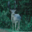

In [27]:
img

In [28]:
label.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [29]:
id_list = list(label['id'])

In [30]:
print(id_list[0:5])

[1, 2, 3, 4, 5]


In [31]:
train_data_folder ='/content/train/'

data = []

for id in id_list:
  img_path = train_data_folder + str(id) +'.png'
  print(img_path)
  if id>=5:
    break;

/content/train/1.png
/content/train/2.png
/content/train/3.png
/content/train/4.png
/content/train/5.png


In [32]:
train_data_folder ='/content/train/'

data = []

for id in id_list:
  img = Image.open(train_data_folder + str(id) + '.png')
  img = np.array(img)
  data.append(img)

In [33]:
type(data)

list

In [34]:
len(data)

50000

In [35]:
type(data[0])

numpy.ndarray

In [36]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
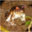

In [37]:
data[0]

In [38]:
#convert images and labels in numpu array

X = np.array(data)
y = np.array(labels)

In [39]:
type(X)

numpy.ndarray

In [40]:
print(X.shape)

(50000, 32, 32, 3)


In [41]:
print(y.shape)

(50000,)


In [42]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [43]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(40000,)
(10000,)


In [44]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

In [45]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

**Building Nueral Netwrok**

In [46]:
import tensorflow as tf
from tensorflow import keras

In [47]:
num_of_classes = 10

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(num_of_classes,activation='softmax')
])

**COmpile Nueral network**

In [48]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['acc'])

**Training the nueral network**

In [49]:
model.fit(X_train_scaled, y_train, validation_split=0.1, epochs=10)

Epoch 1/10
1125/1125 [==============================] - 6s 5ms/step - loss: 2.0724 - acc: 0.2267 - val_loss: 1.9581 - val_acc: 0.2492
Epoch 2/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.9504 - acc: 0.2685 - val_loss: 1.9492 - val_acc: 0.2542
Epoch 3/10
1125/1125 [==============================] - 10s 9ms/step - loss: 1.9329 - acc: 0.2734 - val_loss: 1.9005 - val_acc: 0.2830
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.9165 - acc: 0.2788 - val_loss: 1.8866 - val_acc: 0.2878
Epoch 5/10
1125/1125 [==============================] - 7s 6ms/step - loss: 1.9026 - acc: 0.2870 - val_loss: 1.8761 - val_acc: 0.2842
Epoch 6/10
1125/1125 [==============================] - 10s 9ms/step - loss: 1.8872 - acc: 0.2934 - val_loss: 1.8667 - val_acc: 0.2937
Epoch 7/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.8703 - acc: 0.2989 - val_loss: 1.8597 - val_acc: 0.2965
Epoch 8/10
1125/1125 [==============================] - 6s 6

**RasNet 50**

In [50]:
from tensorflow.keras import Sequential,models, layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [51]:
convolutional_base = ResNet50(weights='imagenet', include_top = False, input_shape = (256,256,3))

94765736/94765736 [==============================] - 4s 0us/step


In [52]:
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [53]:
model = models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes, activation = 'softmax'))

In [54]:
model.compile(optimizer = optimizers.RMSprop(learning_rate=2e-5), loss='sparse_categorical_crossentropy', metrics = ['acc'])

In [ ]:
history = model.fit(X_train_scaled, y_train, validation_split = 0.1, epochs=10)

Epoch 1/10
  21/1125 [..............................] - ETA: 11:30:06 - loss: 2.8779 - acc: 0.1071

In [ ]:
h = history

# Plot the loss value
plt.plot(h.history['loss'], label = 'training loss')
plt.plot(h.history['val_loss'], label = 'validation_loss')
plt.legend()
plt.show()

# Plot the accuracy value
plt.plot(h.history['acc'], label = 'training accuracy')
plt.plot(h.history['val_acc'], label = 'validation accuracy')
plt.legend()
plt.show()